In [1]:
import pandas as pd
import torch as torch
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pandas import DataFrame
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

train = pd.read_csv("./downloads/train.csv")
test = pd.read_csv("./downloads/train.csv")

print(train.columns)
print("Number of features: ", len(train.columns))
print('len of dataset: ', len(train))

survivors = sum(train['Survived' ]== 1)
notsurvivors = len(train) - survivors
print(survivors)
train.describe().columns
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of features:  12
len of dataset:  891
342


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#look into correlations between values and survived

train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [3]:
train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [4]:
train[['Age', 'Survived']].groupby('Age').mean().sort_values(by='Survived', ascending=False)

,Survived
Age,
0.42,1.0
5.00,1.0
63.00,1.0
53.00,1.0
0.67,1.0
...,...
28.50,0.0
36.50,0.0
34.50,0.0


In [5]:
train[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [6]:
train[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [7]:
train[['Fare', 'Survived']].groupby('Fare').mean().sort_values(by='Survived', ascending=False)

,Survived
Fare,
512.3292,1.0
57.9792,1.0
13.8583,1.0
13.7917,1.0
13.4167,1.0
...,...
15.5500,0.0
47.1000,0.0
46.9000,0.0


In [8]:
train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [9]:
train.drop('PassengerId', axis=1, inplace=True)

In [10]:
def getFamilySize(Parch, SibSp):
    return Parch + SibSp + 1


In [11]:
train['FamilySize'] = train.apply(lambda x: getFamilySize(x.Parch, x.SibSp), axis=1)
train[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


Text(0.5, 1.0, 'Passenger Class vs Survival Rate')

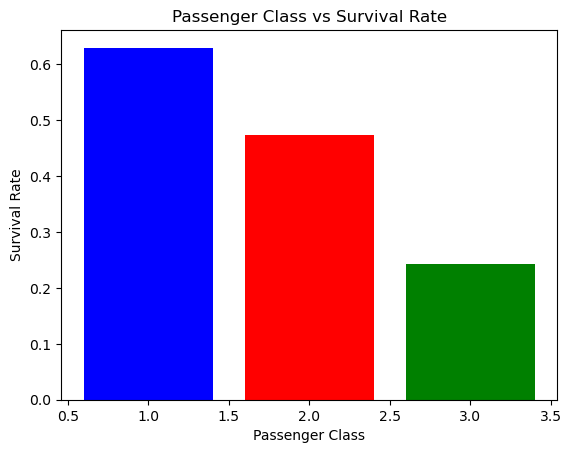

In [12]:
#average_survival = train[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)
average_survival = train.groupby('Pclass')['Survived'].mean().sort_index()
#pClasses = train['Pclass'].nunique()
#print(average_survival)
#plt.bar(, )
#print(train['Pclass'].value_counts()/ len(train))
plt.bar(average_survival.index, average_survival, color=['blue', 'red', 'green'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title("Passenger Class vs Survival Rate")

#class seems to matter heavily

<BarContainer object of 3 artists>

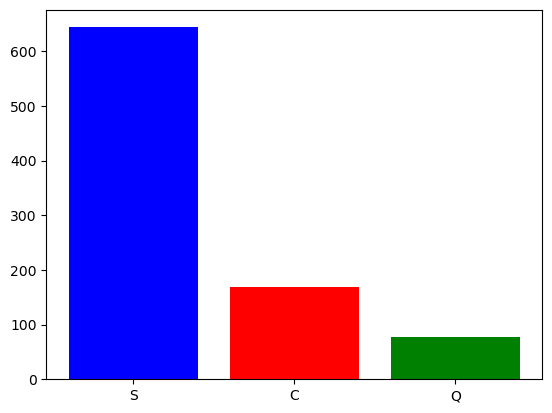

In [13]:
#check based on departure location
#first, find percentage of passengers based on departure location
departure_comp = train['Embarked'].value_counts()
plt.bar(departure_comp.index, departure_comp, color=['blue', 'red', 'green'])

#a vast majority came from the S location, how does it compare to survival?


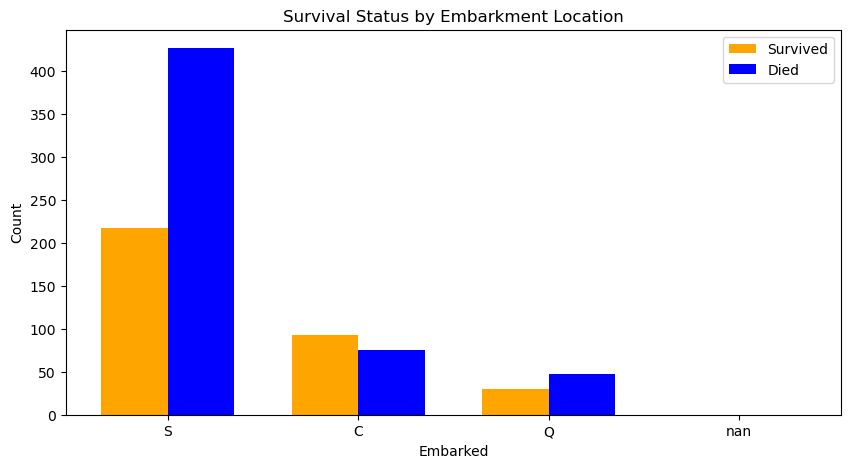

In [14]:


# Get unique embarkation locations
unique_locations = train['Embarked'].unique()

# Calculate counts of passengers who survived and did not survive for each embarkation location
depart_surv = train[train['Survived'] == 1]['Embarked'].value_counts().reindex(unique_locations, fill_value=0)
depart_died = train[train['Survived'] == 0]['Embarked'].value_counts().reindex(unique_locations, fill_value=0)

fig, ax = plt.subplots(figsize=(10, 5))

width = 0.35
index = range(len(unique_locations))

ax.bar(index, depart_surv, width, label='Survived', color='orange')
ax.bar([i + width for i in index], depart_died, width, label='Died', color='blue')

ax.set_xlabel('Embarked')
ax.set_ylabel('Count')
ax.set_title('Survival Status by Embarkment Location')
ax.set_xticks([i + width / 2 for i in index])
ax.set_xticklabels(unique_locations)
ax.legend()

#we can see a difference in survival status based on location, how can we use class and embarkment?




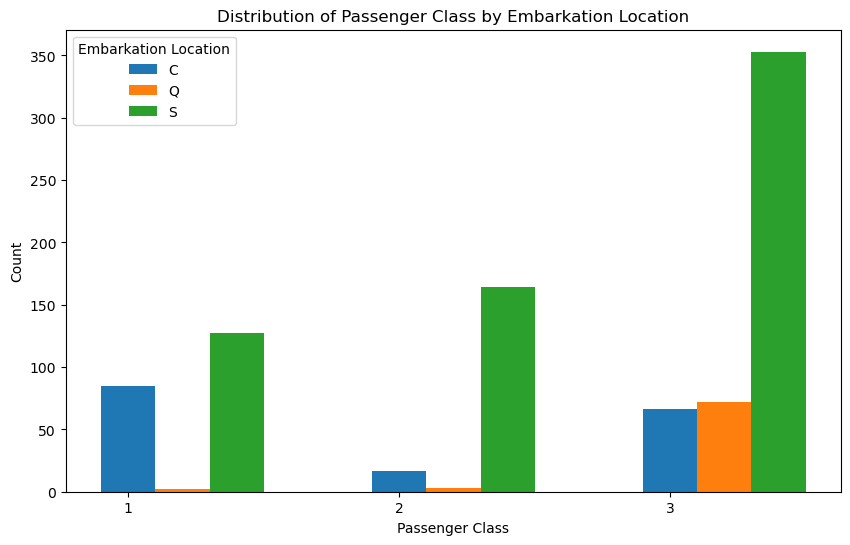

In [15]:
# Create a crosstab between Embarked and Pclass
embarked_pclass_crosstab = pd.crosstab(train['Embarked'], train['Pclass'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each embarkation location
for i, (embarked_location, row) in enumerate(embarked_pclass_crosstab.iterrows()):
    ax.bar(row.index + i * 0.2, row.values, width=0.2, label=embarked_location)

ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.set_title('Distribution of Passenger Class by Embarkation Location')
ax.set_xticks(embarked_pclass_crosstab.columns)
ax.set_xticklabels(embarked_pclass_crosstab.columns)
ax.legend(title='Embarkation Location')

plt.show()

# as we can see, a large portion of the passengers from S are in class 3, we see that class 3 had the lowest survival rate.


In [16]:
# data processing
import re

#train = train.drop(['PassengerId'], axis=1)

#we have a lot of missing values. need to clean data. Will organize into levels rather than cabin for easier trend
deck = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}

# Replace NaN values in the 'Cabin' column with "U"
train['Cabin'] = train['Cabin'].fillna("U")
test['Cabin'] = test['Cabin'].fillna("U")

# Extract the deck letter from the 'Cabin' values and map them using the deck dictionary
train['Deck'] = train['Cabin'].apply(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if pd.notnull(x) else 'U')
train['Deck'] = train['Deck'].map(deck)
test['Deck'] = test['Cabin'].apply(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if pd.notnull(x) else 'U')
test['Deck'] = test['Deck'].map(deck)


train['Deck'].value_counts()
# as we can see, a vast majority didn't have a explicit cabin.
# Deck seems to have little impact on survival overall.
train.groupby('Deck').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Deck,,,,,,,
A,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,1.266667
B,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,1.936170
C,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,2.118644
D,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,1.727273
E,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,1.625000
F,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,2.076923
G,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,2.750000
U,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325,1.912664


In [17]:
# fill in the missing ages with the mean

mean = train['Age'].mean()
train.fillna(mean, axis=1)
test.fillna(mean, axis=1)
#train['Age'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,U,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,U,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,U,S,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,U,S,U
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,U,S,U
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C,C


In [18]:
#going to use Pclass, Age, Embarked, Deck, Sex, and Survived as main indicators

train_numerical_features = list(train.select_dtypes(include=['int64', 'float64', 'int32']).columns)

del train_numerical_features[0]
del train_numerical_features[0]
#feature scaling

scale = StandardScaler()
train_scaled = pd.DataFrame(data=train)
train_scaled[train_numerical_features] = scale.fit_transform(train_scaled[train_numerical_features])

In [19]:
train_scaled.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
0,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,U,S,0.059160,U
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,0.432793,-0.473674,PC 17599,0.786845,C85,C,0.059160,C
2,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,U,S,-0.560975,U
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,0.432793,-0.473674,113803,0.420730,C123,S,0.059160,C
4,0,3,"Allen, Mr. William Henry",male,0.365167,-0.474545,-0.473674,373450,-0.486337,U,S,-0.560975,U


In [20]:
# one hot encoding
encode_col_list = list(train.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_scaled = pd.concat([train_scaled,pd.get_dummies(train_scaled[i], prefix=i)],axis=1)
    train_scaled.drop(i, axis = 1, inplace=True)

In [21]:
train_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
0,0,3,-0.530377,0.432793,-0.473674,-0.502445,0.059160,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0.571831,0.432793,-0.473674,0.786845,0.059160,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,-0.254825,-0.474545,-0.473674,-0.488854,-0.560975,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0.365167,0.432793,-0.473674,0.420730,0.059160,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,3,0.365167,-0.474545,-0.473674,-0.486337,-0.560975,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [22]:
test.drop('Survived', axis=1, inplace=True)
test_numerical_features = list(test.select_dtypes(include=['int64', 'float64', 'int32']).columns)
print(test_numerical_features)
del test_numerical_features[1]
del test_numerical_features[0]
#feature scaling


scale = StandardScaler()
test_scaled = pd.DataFrame(data=test)
test_scaled[test_numerical_features] = scale.fit_transform(test_scaled[test_numerical_features])

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [24]:
# one hot encoding
encode_col_list = list(test.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    test_scaled = pd.concat([test_scaled,pd.get_dummies(test_scaled[i], prefix=i)],axis=1)
    test_scaled.drop(i, axis = 1, inplace=True)


In [25]:
test_scaled.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
0,1,3,-0.530377,0.432793,-0.473674,-0.502445,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,0.571831,0.432793,-0.473674,0.786845,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,3,-0.254825,-0.474545,-0.473674,-0.488854,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1,0.365167,0.432793,-0.473674,0.420730,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,3,0.365167,-0.474545,-0.473674,-0.486337,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [26]:
# modeling

x_train = train_scaled.drop('Survived', axis=1)
y_train = train_scaled['Survived']
x_test = test_scaled.drop("PassengerId", axis=1).copy()

In [29]:
#need to clean the data more
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_U
0,3,-0.530377,0.432793,-0.473674,-0.502445,0.059160,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.571831,0.432793,-0.473674,0.786845,0.059160,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,-0.254825,-0.474545,-0.473674,-0.488854,-0.560975,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0.365167,0.432793,-0.473674,0.420730,0.059160,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,0.365167,-0.474545,-0.473674,-0.486337,-0.560975,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [30]:
#logistic regression
log = LogisticRegression()

log.fit(x_train, y_train)

log_pred = log.predict(x_test)
log_data = pd.read_csv('test.csv')
log_data.insert((log_data.shape[1]), 'Survived', log_pred)
log_data.to_csv('LogisticRegression_Titanic.csv')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').